In [7]:
import requests
from bs4 import BeautifulSoup

# BASE_URL
BASE_URL = 'https://www.iisermohali.ac.in'

# Make an HTTP request to get the content of the website
response = requests.get(f'{BASE_URL}/faculty/people/faculty')

# Check if the request was successful
if response.status_code != 200:
    print("Failed to retrieve the webpage.")
    exit()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Extract faculty rows from the table (skipping the header)
faculty_rows = soup.find_all('tr')[1:]

# Extracting faculty details
faculty_details = []

for row in faculty_rows:
    columns = row.find_all('td')

    # Only consider rows with the expected number of columns (6 columns in this case)
    if len(columns) == 6:
        name_element = columns[0].find('a')
        name = name_element.text if name_element else columns[0].text.strip()
        link = BASE_URL + name_element['href'] if name_element else "No Link Provided"
        department = columns[1].text.strip()
        expertise = columns[2].text.strip()
        office = columns[3].text.strip()
        phone = columns[4].text.strip()
        email = columns[5].text.strip() + "@iisermohali.ac.in"

        faculty_details.append({
            "Name": name,
            "Link": link,
            "Department": department,
            "Expertise": expertise,
            "Office": office,
            "Phone": phone,
            "Email": email
        })

# Print or further process the faculty_details list
for faculty in faculty_details:
    print(faculty)


{'Name': 'Abhik Ganguli', 'Link': 'https://www.iisermohali.ac.in/faculty/dms/aganguli', 'Department': 'Mathematics', 'Expertise': 'Number Theory', 'Office': 'AB2-2F1', 'Phone': '-', 'Email': 'aganguli@iisermohali.ac.in'}
{'Name': 'Abhishek Chaudhuri', 'Link': 'https://www.iisermohali.ac.in/faculty/dps/abhishek', 'Department': 'Physics', 'Expertise': 'Condensed Matter Theory : Soft and Biological Matter', 'Office': 'AB1-2F11', 'Phone': '135', 'Email': 'abhishek@iisermohali.ac.in'}
{'Name': "Adrene Freeda D 'cruz", 'Link': 'https://www.iisermohali.ac.in/faculty/hss/adrene', 'Department': 'HSS', 'Expertise': 'Postwar American Literature', 'Office': '-', 'Phone': '-', 'Email': 'adrene@iisermohali.ac.in'}
{'Name': 'Alok Kumar Maharana', 'Link': 'https://www.iisermohali.ac.in/faculty/dms/maharana', 'Department': 'Mathematics', 'Expertise': 'Algebraic Geometry', 'Office': '-', 'Phone': '-', 'Email': 'maharana@iisermohali.ac.in'}
{'Name': 'Amit Kulshrestha', 'Link': 'https://www.iisermohali.ac

In [14]:
import requests
from bs4 import BeautifulSoup
import re

response = requests.get("https://www.iisermohali.ac.in/faculty/dps/abhishek")
soup = BeautifulSoup(response.content, 'html.parser')

pattern = re.compile(r'font-family:\s*arial,helvetica,sans-serif')
elements = soup.find_all('span', style=pattern)
texts = [element.text.strip() for element in elements]

for text in texts:
    print(text)


Associate Professor, Physical Sciences
Email
abhishek(AT)iisermohali.ac.in
Phone
+91 172 2293129
Fax
+91 172 2240266
Personal Page

Research Area
Condensed Matter Theory : Soft and Biological Matter
Research Focus
Research Focus
Research Area: Condensed Matter Theory : Soft and Biological MatterThe aim of our group is to understand the physical properties of biological and soft condensed matter systems that are driven out of equilibrium. We use both analytical approaches (Equilibrium and Non-equilibrium Statistical Mechanics, Hydrodynamics) and computational methods (Molecular Dynamics, Brownian Dynamics, Monte Carlo) to investigate the dynamics of systems ranging from the cell membrane and the cell cytoskeleton to polymers and colloids in confinement.The cell is an active dynamical medium, constantly generating and dissipating energy to sustain the various life processes. It is subject to active stresses arising from a meshwork of filaments (cell cytoskeleton), which is driven out of 

In [17]:

url = "https://www.iisermohali.ac.in/faculty/dps/abhishek"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Fetching text with the specified font family
texts = [span.get_text(strip=True) for span in soup.find_all('span', style=lambda value: value and "font-family: arial,helvetica,sans-serif;" in value)]

# Proceeding with the organization of the data
data = {}
data['Position'] = texts[0]  # This seems to be the first item

# Extracting Email, Phone, Fax, and Personal Page
data['Email'] = texts[texts.index('Email') + 1]
data['Phone'] = texts[texts.index('Phone') + 1]
data['Fax'] = texts[texts.index('Fax') + 1]

# For the Personal Page, we will search for any 'a' tag after the 'Fax' data
personal_page_tag = soup.find('span', string=data['Fax']).find_next('a')
# Check for a valid 'http' link for Personal Page
data['Personal Page'] = personal_page_tag['href'] if personal_page_tag and re.match(r'^http', personal_page_tag['href']) else 'N/A'


# Extracting Research Area and Research Focus
data['Research Area'] = texts[texts.index('Research Area') + 1]
# research_focus_index = texts.index('Research Focus') + 1
# data['Research Focus'] = texts[research_focus_index]

# Extracting Selected Publications
publications_start_index = texts.index('Selected Publications') + 1
data['Selected Publications'] = texts[publications_start_index:]

data

{'Position': 'Associate Professor, Physical Sciences',
 'Email': 'abhishek(AT)iisermohali.ac.in',
 'Phone': '+91 172 2293129',
 'Fax': '+91 172 2240266',
 'Personal Page': 'N/A',
 'Research Area': 'Condensed Matter Theory : Soft and Biological Matter',
 'Selected Publications': ['Abhishek Chaudhuri, Bhaswati Bhattacharya, Kripa Gowrishankar, Satyajit Mayor and Madan Rao Spatiotemporal regulation of chemical reaction kinetics of cell surface molecules by active remodeling of cortical actin, Proc. Natl. Acad. Sci. USA 108, 14825 (2011).',
  'Abhishek Chaudhuri, Giuseppe Battaglia and Ramin Golestanian Effect of interactions on the cellular uptake of nanoparticles, Phys. Biol. 8, 046002 (2011) Selected as highlights of 2011 in Physical Biology.',
  'Jack Cohen, Abhishek Chaudhuri and Ramin Golestanian Active polymer translocation through flickering pores, Phys. Rev. Lett. 107, 238102 (2011).',
  'Abhishek Chaudhuri, Anupam Kundu, Dibyendu Roy, Abhishek Dhar, Joel L. Lebowitz and Herbert S

In [18]:

url = "https://www.iisermohali.ac.in/faculty/dms/aganguli"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Fetching text with the specified font family
texts = [span.get_text(strip=True) for span in soup.find_all('span', style=lambda value: value and "font-family: arial,helvetica,sans-serif;" in value)]

# Proceeding with the organization of the data
data = {}
data['Position'] = texts[0]  # This seems to be the first item

# Extracting Email, Phone, Fax, and Personal Page
data['Email'] = texts[texts.index('Email') + 1]
data['Phone'] = texts[texts.index('Phone') + 1]
data['Fax'] = texts[texts.index('Fax') + 1]

# For the Personal Page, we will search for any 'a' tag after the 'Fax' data
personal_page_tag = soup.find('span', string=data['Fax']).find_next('a')
# Check for a valid 'http' link for Personal Page
data['Personal Page'] = personal_page_tag['href'] if personal_page_tag and re.match(r'^http', personal_page_tag['href']) else 'N/A'


# Extracting Research Area and Research Focus
data['Research Area'] = texts[texts.index('Research Area') + 1]
# research_focus_index = texts.index('Research Focus') + 1
# data['Research Focus'] = texts[research_focus_index]

# Extracting Selected Publications
publications_start_index = texts.index('Selected Publications') + 1
data['Selected Publications'] = texts[publications_start_index:]

data

{'Position': 'Assistant Professor, Mathematical\xa0 Sciences',
 'Email': 'aganguli(AT)iisermohali.ac.in',
 'Phone': 'Fax',
 'Fax': '+91 172 2240124',
 'Personal Page': 'https://sites.google.com/site/abhikganguli/',
 'Research Area': 'Number Theory',
 'Selected Publications': ['Abhik Ganguli, Eknath GhateReductions of Galois representations via the mod p Local Langlands correspondence,J. Number Theory 147 (2015), 250-286.']}

In [20]:
from bs4 import BeautifulSoup
import requests
import re

def fetch_faculty_info(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Fetching text with the specified font family
    texts = [span.get_text(strip=True) for span in soup.find_all('span', style=lambda value: value and "font-family: arial,helvetica,sans-serif;" in value)]

    # Organizing the data
    data = {}
    data['Position'] = texts[0]  # This seems to be the first item

    # Extracting Email, Phone, Fax, and Personal Page
    data['Email'] = texts[texts.index('Email') + 1]
    data['Phone'] = texts[texts.index('Phone') + 1]
    data['Fax'] = texts[texts.index('Fax') + 1]

    # For the Personal Page, we will search for any 'a' tag after the 'Fax' data
    personal_page_tag = soup.find('span', string=data['Fax']).find_next('a')
    # Check for a valid 'http' link for Personal Page
    data['Personal Page'] = personal_page_tag['href'] if personal_page_tag and re.match(r'^http', personal_page_tag['href']) else 'N/A'

    # Extracting Research Area and Research Focus
    data['Research Area'] = texts[texts.index('Research Area') + 1]

    # Extracting Selected Publications
    publications_start_index = texts.index('Selected Publications') + 1
    data['Selected Publications'] = texts[publications_start_index:]

    return data

# Example usage:
url = "https://www.iisermohali.ac.in/faculty/dps/abhishek"
info = fetch_faculty_info(url)
info


{'Position': 'Associate Professor, Physical Sciences',
 'Email': 'abhishek(AT)iisermohali.ac.in',
 'Phone': '+91 172 2293129',
 'Fax': '+91 172 2240266',
 'Personal Page': 'N/A',
 'Research Area': 'Condensed Matter Theory : Soft and Biological Matter',
 'Selected Publications': ['Abhishek Chaudhuri, Bhaswati Bhattacharya, Kripa Gowrishankar, Satyajit Mayor and Madan Rao Spatiotemporal regulation of chemical reaction kinetics of cell surface molecules by active remodeling of cortical actin, Proc. Natl. Acad. Sci. USA 108, 14825 (2011).',
  'Abhishek Chaudhuri, Giuseppe Battaglia and Ramin Golestanian Effect of interactions on the cellular uptake of nanoparticles, Phys. Biol. 8, 046002 (2011) Selected as highlights of 2011 in Physical Biology.',
  'Jack Cohen, Abhishek Chaudhuri and Ramin Golestanian Active polymer translocation through flickering pores, Phys. Rev. Lett. 107, 238102 (2011).',
  'Abhishek Chaudhuri, Anupam Kundu, Dibyendu Roy, Abhishek Dhar, Joel L. Lebowitz and Herbert S

In [22]:
import requests
from bs4 import BeautifulSoup
import csv
import re


BASE_URL = 'https://www.iisermohali.ac.in'


def fetch_faculty_info(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Fetching text with the specified font family
    texts = [span.get_text(strip=True) for span in soup.find_all('span', style=lambda value: value and "font-family: arial,helvetica,sans-serif;" in value)]
    
    # Organizing the data
    data = {}
    if texts:
        data['Position'] = texts[0]
        data['Email'] = texts[texts.index('Email') + 1] if 'Email' in texts else 'N/A'
        data['Phone'] = texts[texts.index('Phone') + 1] if 'Phone' in texts else 'N/A'
        data['Fax'] = texts[texts.index('Fax') + 1] if 'Fax' in texts else 'N/A'

        # Personal Page
        fax_span = soup.find('span', string=data.get('Fax', ''))
        personal_page_tag = fax_span.find_next('a') if fax_span else None
        data['Personal Page'] = personal_page_tag['href'] if personal_page_tag and re.match(r'^http', personal_page_tag['href']) else 'N/A'

        # Research Area and Selected Publications
        if 'Research Area' in texts:
            data['Research Area'] = texts[texts.index('Research Area') + 1]
        if 'Selected Publications' in texts:
            publications_start_index = texts.index('Selected Publications') + 1
            data['Selected Publications'] = texts[publications_start_index:]
    return data


response = requests.get(f'{BASE_URL}/faculty/people/faculty')
soup = BeautifulSoup(response.content, 'html.parser')
faculty_rows = soup.find_all('tr')[1:]

faculty_details = []

for row in faculty_rows:
    columns = row.find_all('td')
    if len(columns) == 6:
        faculty = {}
        name_element = columns[0].find('a')
        faculty['Name'] = name_element.text if name_element else columns[0].text.strip()
        faculty['Link'] = BASE_URL + name_element['href'] if name_element else "No Link Provided"
        faculty['Department'] = columns[1].text.strip()
        faculty['Expertise'] = columns[2].text.strip()
        faculty['Office'] = columns[3].text.strip()
        faculty['Phone'] = columns[4].text.strip()
        faculty['Email'] = columns[5].text.strip() + "@iisermohali.ac.in"
        
        # Fetching details from the faculty's personal page
        additional_info = fetch_faculty_info(faculty['Link'])
        faculty.update(additional_info)
        
        faculty_details.append(faculty)


# Write to CSV
with open('faculty_details.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Name', 'Link', 'Department', 'Expertise', 'Position', 'Phone', 'Fax', 'Personal Page', 'Selected Publications']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for faculty in faculty_details:
        writer.writerow(faculty)


ProxyError: HTTPSConnectionPool(host='www.iisermohali.ac.inhttps', port=443): Max retries exceeded with url: //www.iisermohali.ac.in/finance-committee/people/dr-j-gowrishankar (Caused by ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 503 Service Unavailable')))

In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

BASE_URL = 'https://www.iisermohali.ac.in'

def fetch_faculty_info(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Fetching text with the specified font family
        texts = [span.get_text(strip=True) for span in soup.find_all('span', style=lambda value: value and "font-family: arial,helvetica,sans-serif;" in value)]
        
        # Organizing the data
        data = {}
        if texts:
            data['Position'] = texts[0]
            data['Email'] = texts[texts.index('Email') + 1] if 'Email' in texts else 'N/A'
            data['Phone'] = texts[texts.index('Phone') + 1] if 'Phone' in texts else 'N/A'
            data['Fax'] = texts[texts.index('Fax') + 1] if 'Fax' in texts else 'N/A'

            # Personal Page
            fax_span = soup.find('span', string=data.get('Fax', ''))
            personal_page_tag = fax_span.find_next('a') if fax_span else None
            data['Personal Page'] = personal_page_tag['href'] if personal_page_tag and re.match(r'^http', personal_page_tag['href']) else 'N/A'

            # Research Area and Selected Publications
            if 'Research Area' in texts:
                data['Research Area'] = texts[texts.index('Research Area') + 1]
            if 'Selected Publications' in texts:
                publications_start_index = texts.index('Selected Publications') + 1
                data['Selected Publications'] = texts[publications_start_index:]
    except:
        data = {
            'Position': 'N/A',
            'Email': 'N/A',
            'Phone': 'N/A',
            'Fax': 'N/A',
            'Personal Page': 'N/A',
            'Research Area': 'N/A',
            'Selected Publications': 'N/A'
        }
    return data

response = requests.get(f'{BASE_URL}/faculty/people/faculty')
soup = BeautifulSoup(response.content, 'html.parser')
faculty_rows = soup.find_all('tr')[1:]

# Create an empty DataFrame to store faculty details
df = pd.DataFrame()

for row in faculty_rows:
    columns = row.find_all('td')
    if len(columns) == 6:
        faculty = {}
        name_element = columns[0].find('a')
        faculty['Name'] = name_element.text if name_element else columns[0].text.strip()
        
        # Check if the link already contains the BASE_URL
        if name_element and BASE_URL not in name_element['href']:
            faculty['Link'] = BASE_URL + name_element['href']
        else:
            faculty['Link'] = name_element['href'] if name_element else "No Link Provided"
        
        faculty['Department'] = columns[1].text.strip()
        faculty['Expertise'] = columns[2].text.strip()
        faculty['Office'] = columns[3].text.strip()
        faculty['Phone'] = columns[4].text.strip()
        faculty['Email'] = columns[5].text.strip() + "@iisermohali.ac.in"
        
        # Fetching details from the faculty's personal page
        additional_info = fetch_faculty_info(faculty['Link'])
        faculty.update(additional_info)
        
        # Append the faculty details to the dataframe
        df = df.append(faculty, ignore_index=True)

# Save the dataframe to a CSV file
df.to_csv('faculty_details.csv', index=False, encoding='utf-8')


/tmp/ipykernel_10503/3277567117.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(faculty, ignore_index=True)
/tmp/ipykernel_10503/3277567117.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(faculty, ignore_index=True)
/tmp/ipykernel_10503/3277567117.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(faculty, ignore_index=True)
/tmp/ipykernel_10503/3277567117.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(faculty, ignore_index=True)
/tmp/ipykernel_10503/3277567117.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

In [28]:
import sqlite3
import pandas as pd

# Read the CSV file using pandas
df = pd.read_csv('faculty_details.csv')

# Create an SQLite database in memory (or you can use a file)
conn = sqlite3.connect('iisermohali_faculty.db')

# Save the dataframe to SQLite table
df.to_sql('faculty', conn, if_exists='replace', index=False)

# Make sure to close the connection when you're done
conn.close()


In [29]:
# Connect to the SQLite database
conn = sqlite3.connect('iisermohali_faculty.db')
cursor = conn.cursor()

# Query the database
cursor.execute("SELECT Name, Position FROM faculty WHERE Department='Physics'")
results = cursor.fetchall()

for row in results:
    print(row)

# Close the connection
conn.close()


('Abhishek Chaudhuri', 'Associate Professor, Physical Sciences')
('Ambresh Shivaji', 'Assistant Professor , Physical Sciences')
('Ananth Venkatesan', 'Associate Professor, Physical Sciences')
('Arvind', 'Professor , Physical Sciences')
('Dipanjan Chakraborty', 'Associate Professor , Physical Sciences')
('Goutam Sheet', 'Associate Professor , Physical Sciences')
('Harvinder Kaur Jassal', 'Associate Professor, Physical Sciences')
('Jasjeet Singh Bagla', 'Professor , Physical Sciences')
('K. P. Singh', 'Professor , Physical Sciences')
('K. P. Yogendran', 'Assistant Professor , Physical Sciences')
('Kavita Dorai', 'Professor, Physical Sciences')
('Kinjalk Lochan', None)
('Manabendra Nath Bera', 'Assistant Professor , Physical Sciences')
('Mandip Singh', 'Associate Professor, Physical Sciences')
('Prasenjit Das', 'Assistant Professor,\xa0Physical sciences')
('Rajeev Kapri', 'Associate Professor, Physical Sciences')
('Ramandeep Singh Johal', 'Professor, Physical Sciences')
('Samir Kumar Bisw

In [30]:
# Extracting the number of publications from the 'Selected Publications' column
df['Publication Count'] = df['Selected Publications'].str.split(';').str.len()

# Handling rows where 'Selected Publications' is 'N/A'
df['Publication Count'] = df['Publication Count'].where(df['Selected Publications'] != 'N/A', 0)

df[['Name', 'Position', 'Publication Count']].head()


,Name,Position,Publication Count
0,Abhik Ganguli,"Assistant Professor, Mathematical Sciences",1.0
1,Abhishek Chaudhuri,"Associate Professor, Physical Sciences",1.0
2,Adrene Freeda D 'cruz,"Assistant Professor , Humanities and Social Sc...",1.0
3,Alok Kumar Maharana,"Assistant Professor , Mathematical Sciences",1.0
4,Amit Kulshrestha,"Associate Professor, Head, Mathematical Sciences",1.0


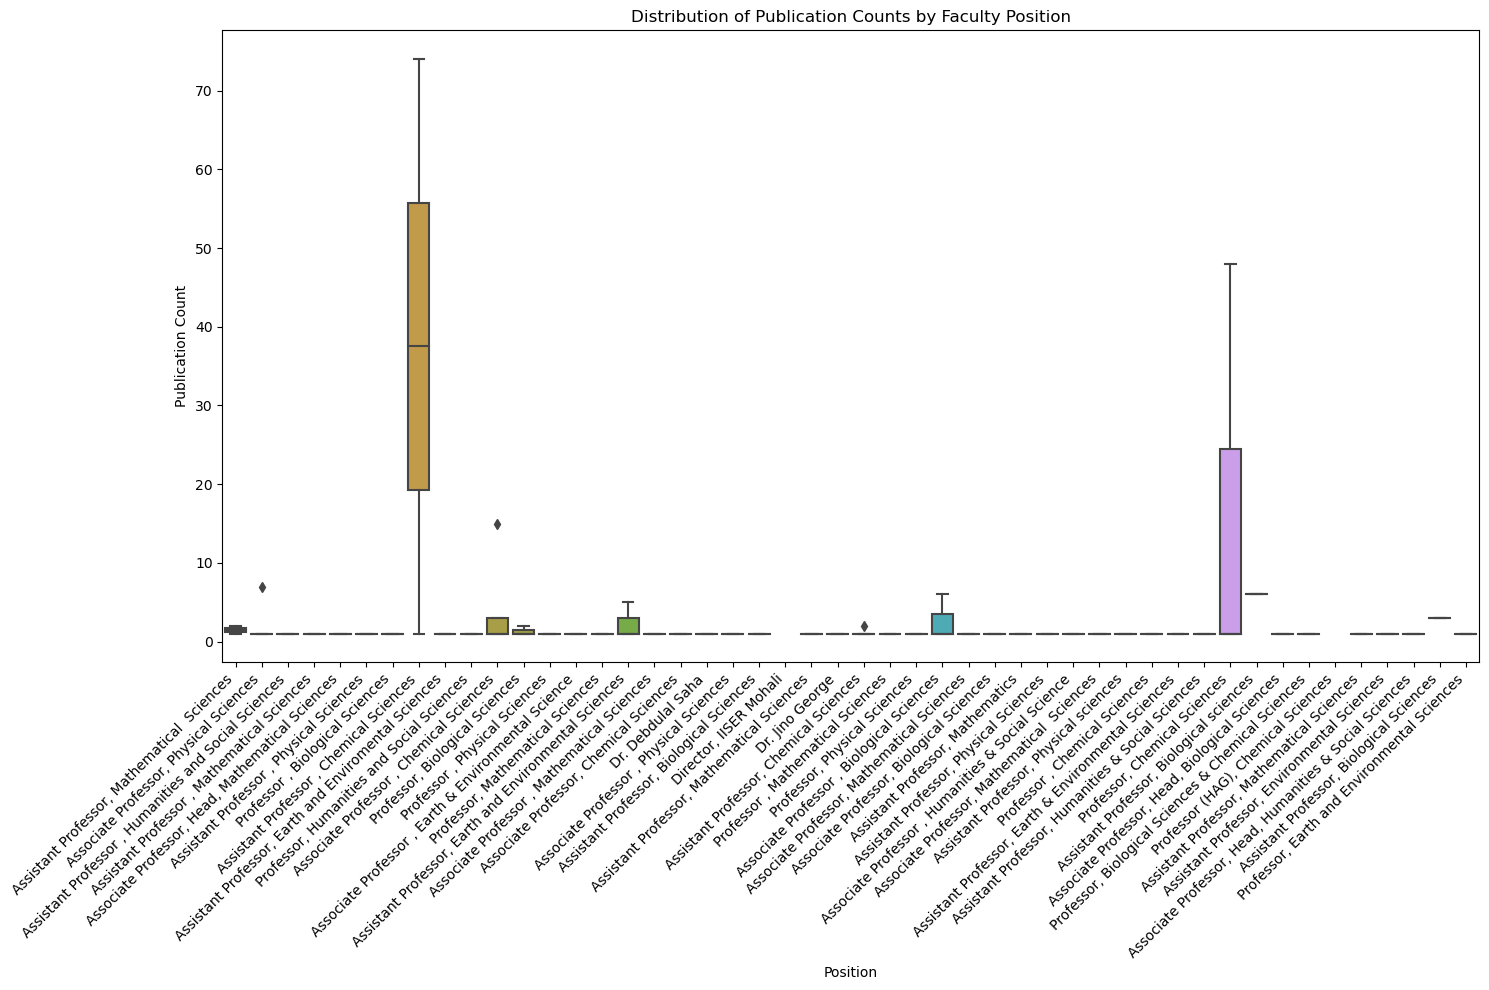

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.boxplot(x="Position", y="Publication Count", data=df)
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Publication Counts by Faculty Position")
plt.tight_layout()
plt.show()


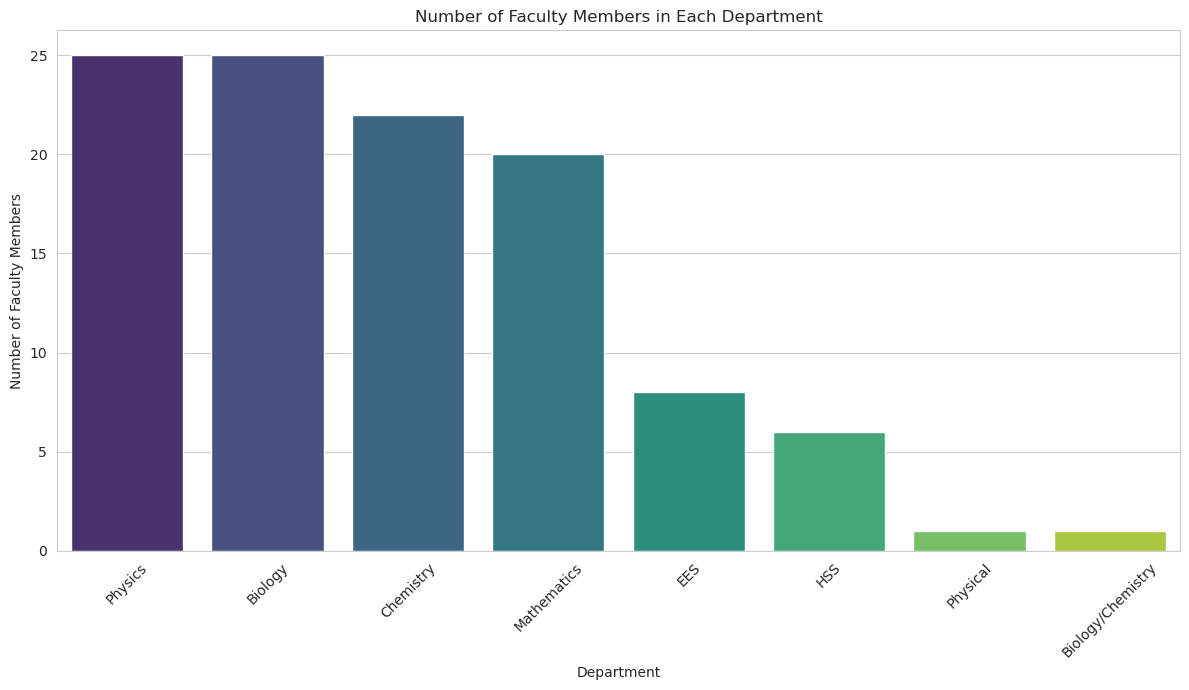

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a style for the plots
sns.set_style("whitegrid")

# 1. Number of Faculty Members in Each Department
faculty_count_per_department = df['Department'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=faculty_count_per_department.index, y=faculty_count_per_department.values, palette="viridis")
plt.title('Number of Faculty Members in Each Department')
plt.xlabel('Department')
plt.ylabel('Number of Faculty Members')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


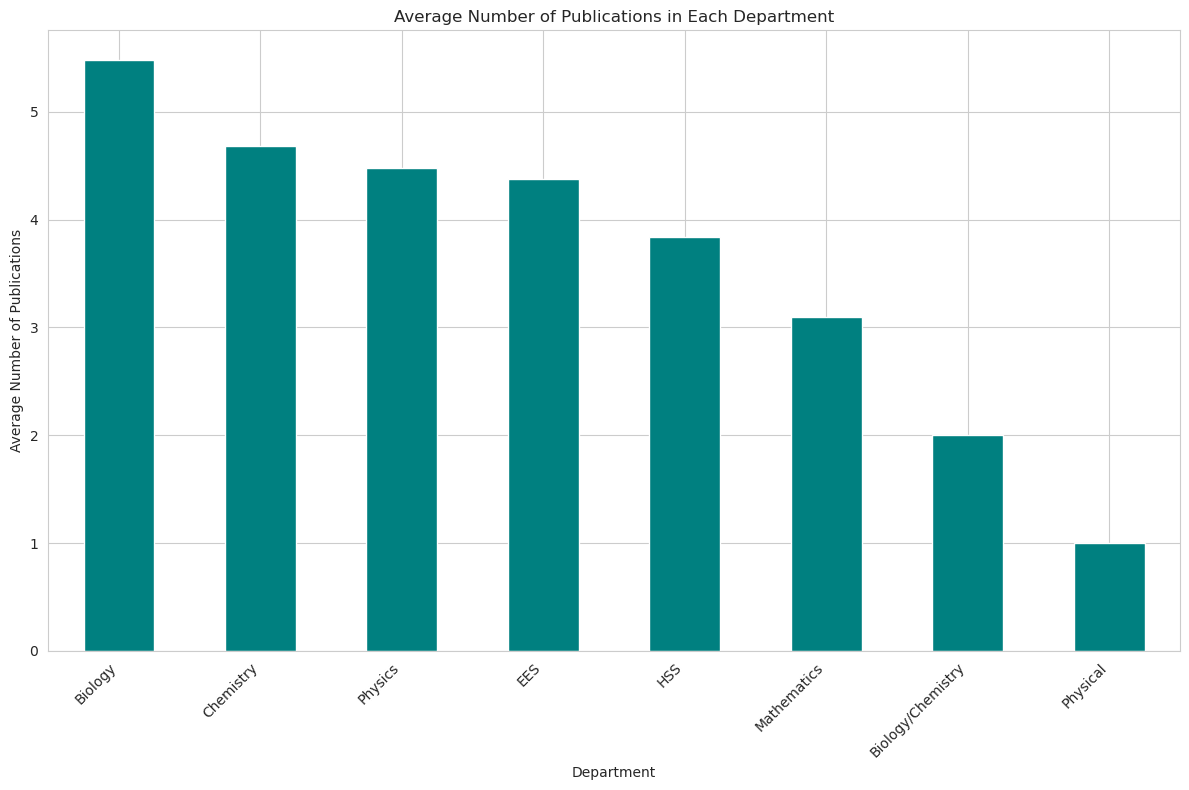

In [33]:
# Extracting number of publications for each faculty
df['Num_Publications'] = df['Selected Publications'].apply(lambda x: len(eval(x)) if isinstance(x, str) and x != 'N/A' else 0)

# Group by department and compute the average number of publications
avg_publications = df.groupby('Department')['Num_Publications'].mean().sort_values(ascending=False)

# Plotting the results
plt.figure(figsize=(12, 8))
avg_publications.plot(kind='bar', color='teal')
plt.title('Average Number of Publications in Each Department')
plt.ylabel('Average Number of Publications')
plt.xlabel('Department')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


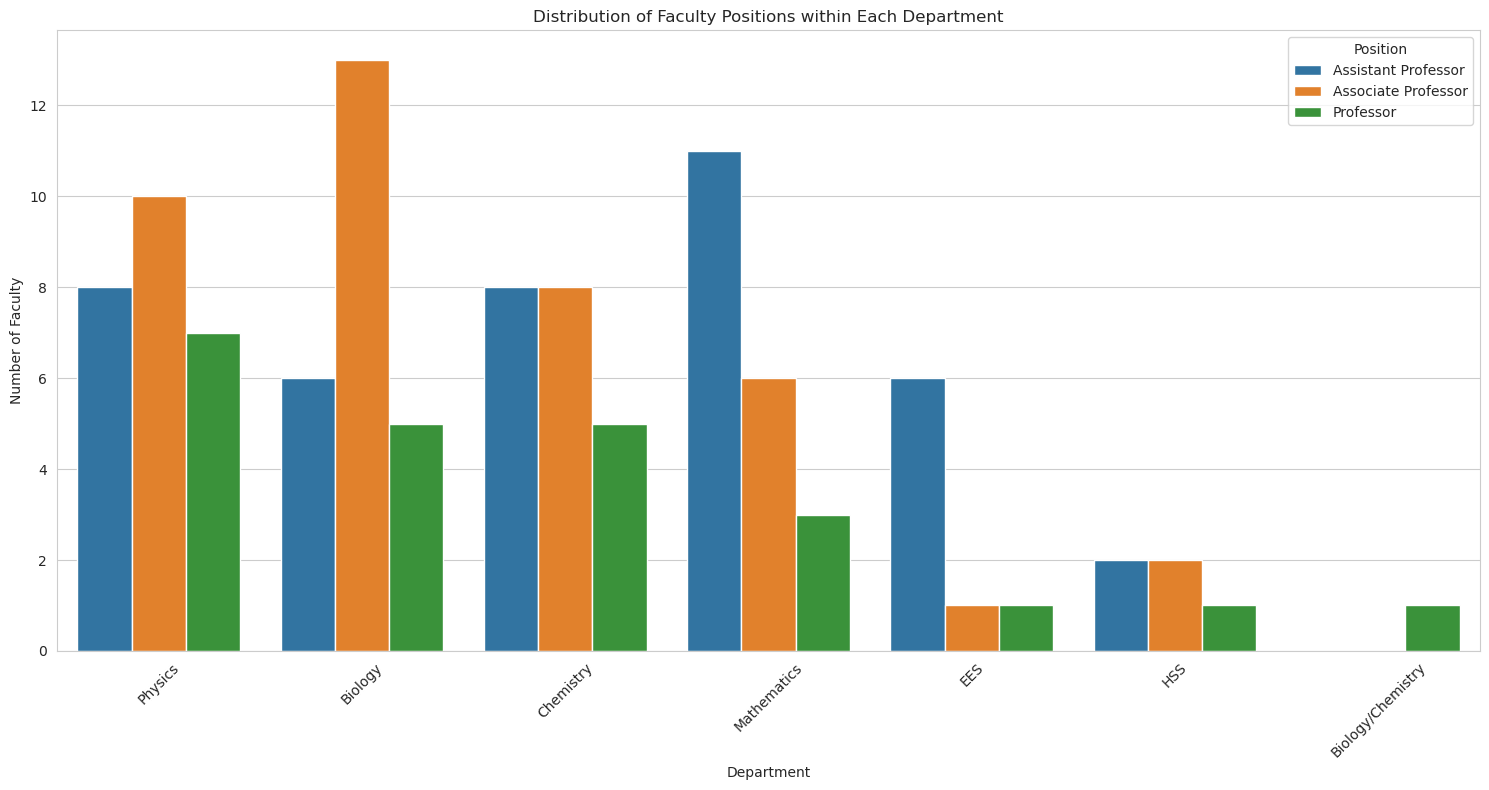

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the CSV file into a dataframe
faculty_df = pd.read_csv('faculty_details.csv')

# Cleaning the 'Position' column
faculty_df['Position'] = faculty_df['Position'].str.replace('\xa0', ' ').str.strip()
faculty_df['Position'] = faculty_df['Position'].apply(lambda x: 'Assistant Professor' if 'Assistant Professor' in str(x) else x)
faculty_df['Position'] = faculty_df['Position'].apply(lambda x: 'Associate Professor' if 'Associate Professor' in str(x) else x)
faculty_df['Position'] = faculty_df['Position'].apply(lambda x: 'Professor' if 'Professor' in str(x) and 'Assistant' not in str(x) and 'Associate' not in str(x) else x)

# Cleaning the 'Department' column
faculty_df['Department'] = faculty_df['Department'].replace('Physical', 'Physics')

# Filtering data to include only the mentioned positions
filtered_df = faculty_df[faculty_df['Position'].isin(['Associate Professor', 'Assistant Professor', 'Professor'])]

# Plotting the distribution of positions within each department
plt.figure(figsize=(15, 8))
sns.countplot(data=filtered_df, x='Department', hue='Position', order=filtered_df['Department'].value_counts().index)
plt.title('Distribution of Faculty Positions within Each Department')
plt.ylabel('Number of Faculty')
plt.xlabel('Department')
plt.legend(title='Position')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


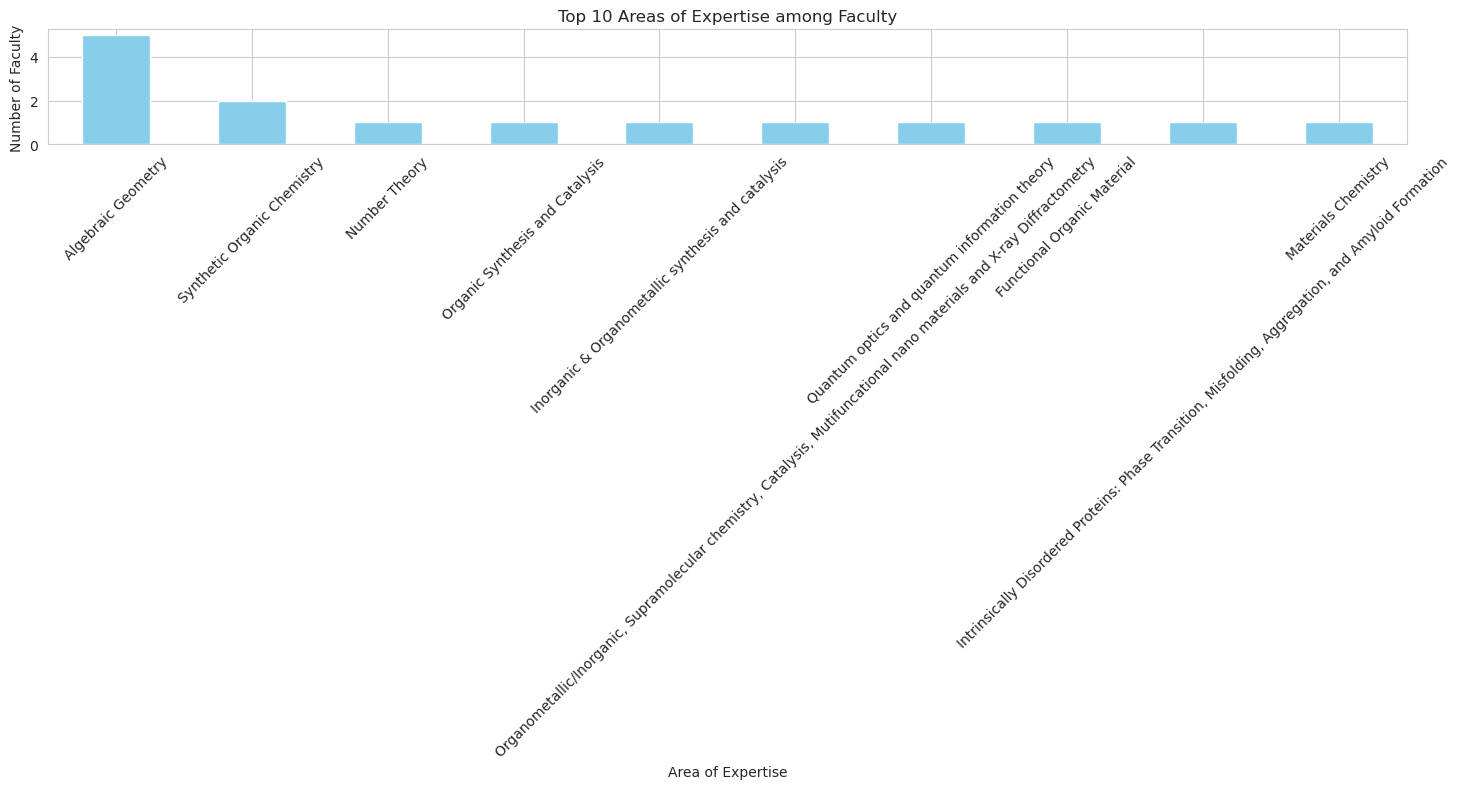

Algebraic Geometry                                                                                                        5
Synthetic Organic Chemistry                                                                                               2
Number Theory                                                                                                             1
Organic Synthesis and Catalysis                                                                                           1
Inorganic & Organometallic synthesis and catalysis                                                                        1
Organometallic/Inorganic, Supramolecular chemistry, Catalysis, Mutifuncational nano materials and X-ray Diffractometry    1
Quantum optics and quantum information theory                                                                             1
Functional Organic Material                                                                                               1
Intrinsi

In [37]:
# Analyzing the 'Expertise' column
expertise_counts = faculty_df['Expertise'].value_counts()

# Getting the top 10 areas of expertise
top_expertise = expertise_counts.head(10)

# Plotting the distribution of top areas of expertise
plt.figure(figsize=(15, 8))
top_expertise.plot(kind='bar', color='skyblue')
plt.title('Top 10 Areas of Expertise among Faculty')
plt.ylabel('Number of Faculty')
plt.xlabel('Area of Expertise')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_expertise


/home/posiden/anaconda3/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


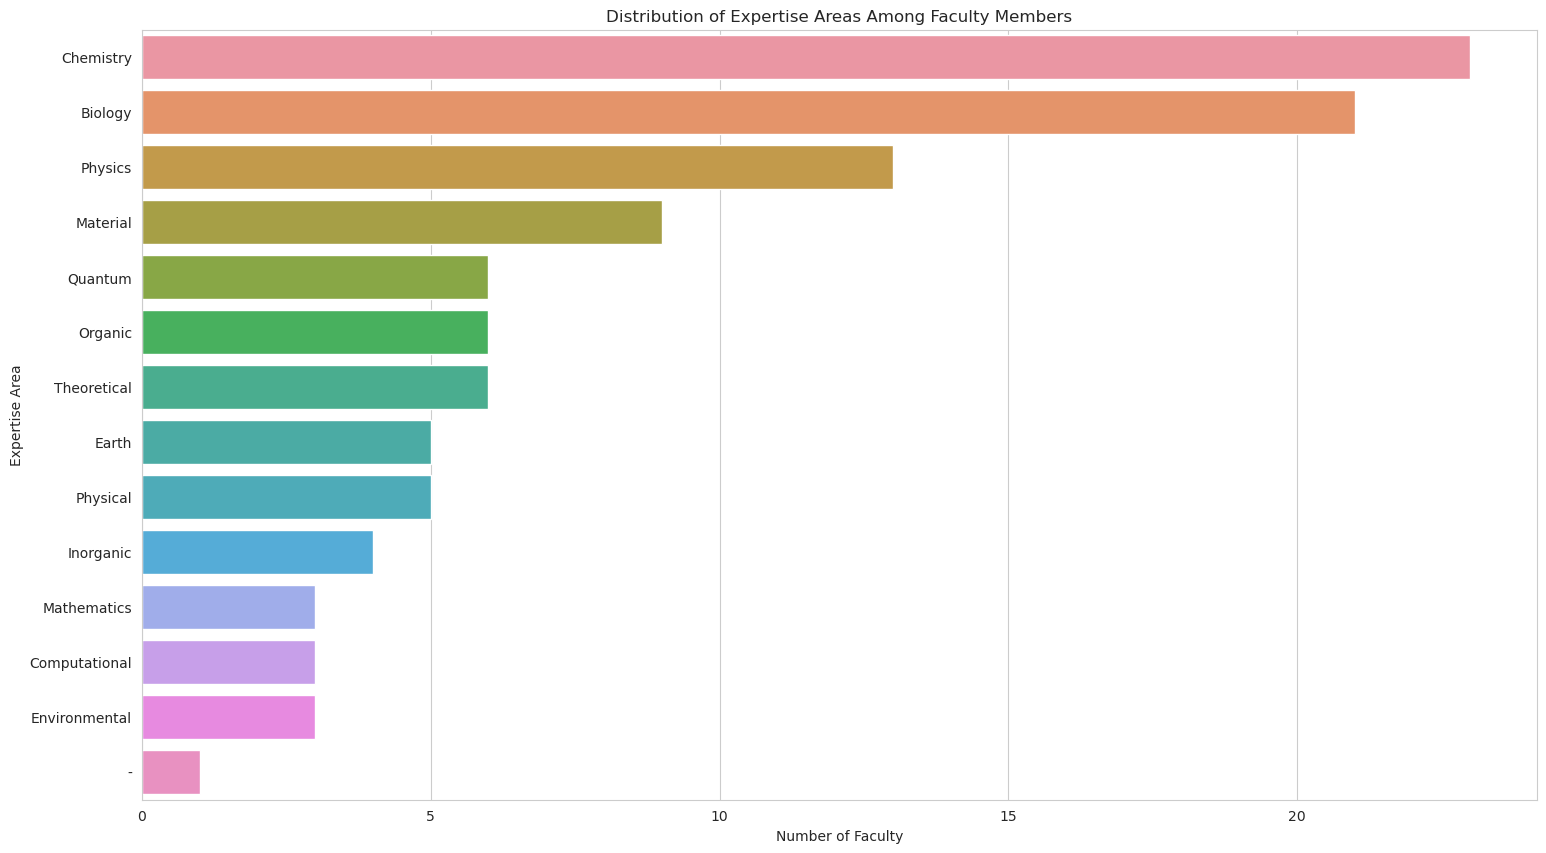

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import process

# Load the data
faculty_df = pd.read_csv('faculty_details.csv')

# Extract expertise before the comma
faculty_df['Cleaned Expertise'] = faculty_df['Expertise'].str.split(',').str[0]

# Define a function to group expertise areas based on similarity
def group_expertise(expertise):
    max_score = 0
    group = expertise
    for key, values in expertise_groups.items():
        score = max([process.extractOne(expertise, values)[1] for expertise in [expertise]])
        if score > max_score:
            max_score = score
            group = key
    return group

# Defining initial expertise groups based on common expertise areas
expertise_groups = {
    'Chemistry': ['Chemistry'],
    'Physics': ['Physics'],
    'Biology': ['Biology', 'Biological'],
    'Mathematics': ['Mathematics', 'Mathematical'],
    'Environmental': ['Environmental'],
    'Earth': ['Earth'],
    'Material': ['Material'],
    'Quantum': ['Quantum'],
    'Theoretical': ['Theoretical'],
    'Computational': ['Computational'],
    'Organic': ['Organic'],
    'Inorganic': ['Inorganic'],
    'Physical': ['Physical']
}

faculty_df['Grouped Expertise'] = faculty_df['Cleaned Expertise'].apply(group_expertise)

# Plotting the distribution of expertise areas among faculty members
plt.figure(figsize=(18, 10))
expertise_counts = faculty_df['Grouped Expertise'].value_counts()
sns.barplot(y=expertise_counts.index, x=expertise_counts.values, orient='h')
plt.title('Distribution of Expertise Areas Among Faculty Members')
plt.xlabel('Number of Faculty')
plt.ylabel('Expertise Area')
plt.show()


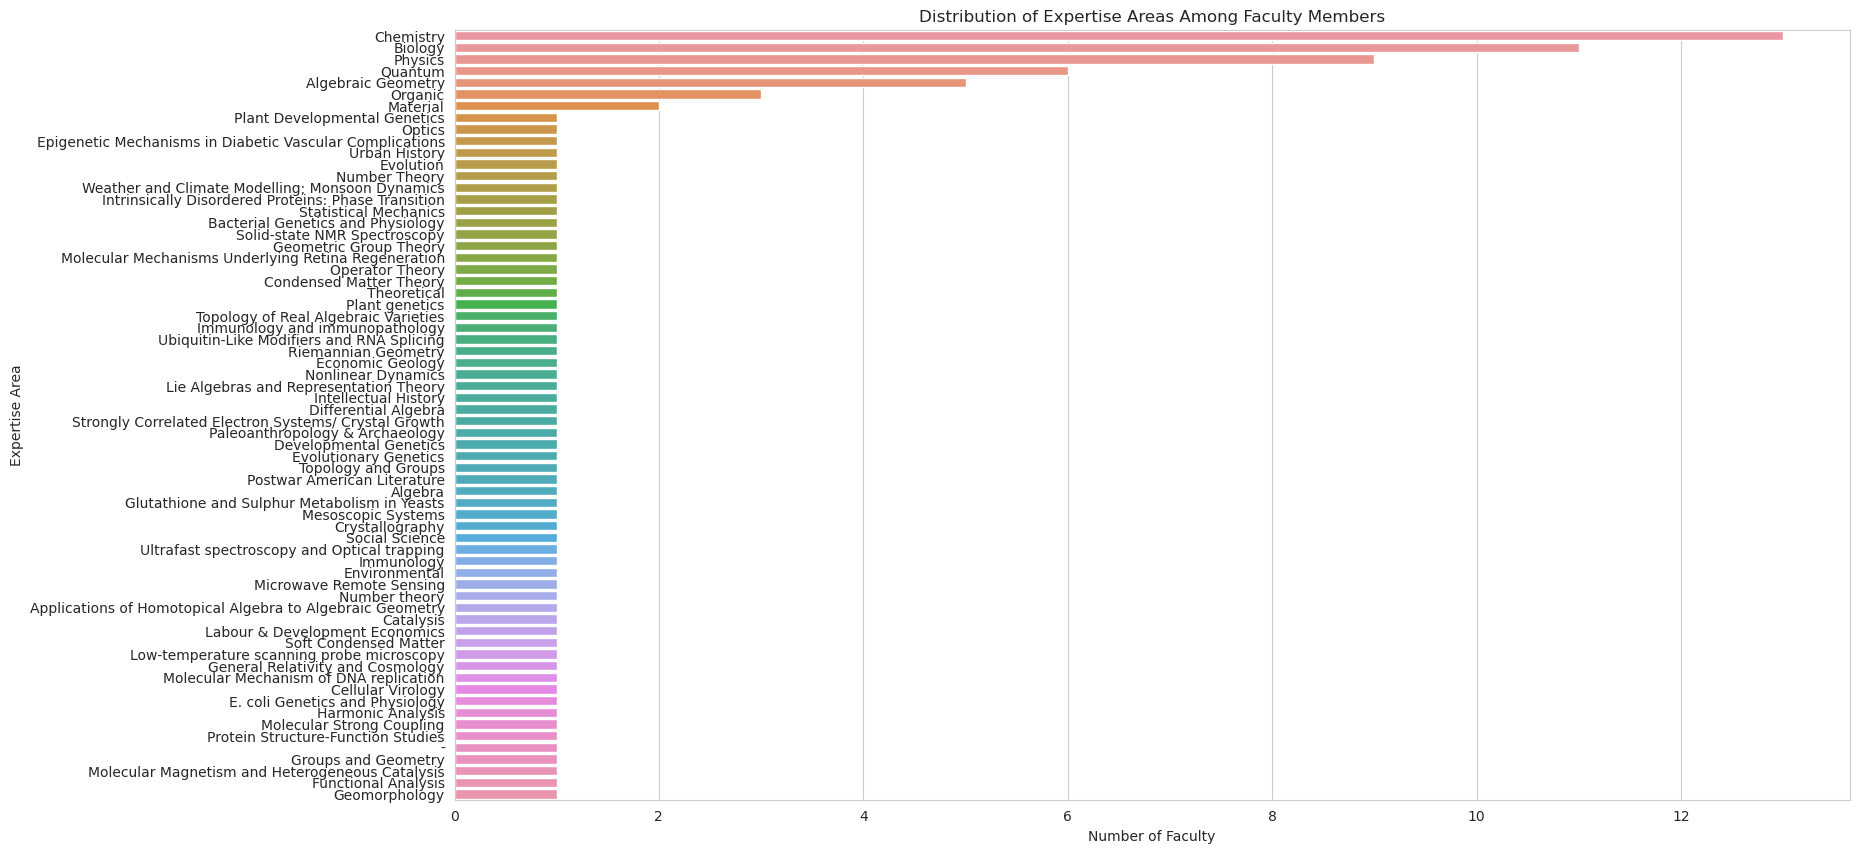

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
faculty_df = pd.read_csv('faculty_details.csv')

# Extract expertise before the comma
faculty_df['Cleaned Expertise'] = faculty_df['Expertise'].str.split(',').str[0]

# Define a function to group expertise areas based on keywords
def group_expertise(expertise):
    for key, values in expertise_groups.items():
        for value in values:
            if value.lower() in expertise.lower():
                return key
    return expertise

# Defining initial expertise groups based on common expertise areas
expertise_groups = {
    'Chemistry': ['Chemistry'],
    'Physics': ['Physics'],
    'Biology': ['Biology', 'Biological'],
    'Mathematics': ['Mathematics', 'Mathematical'],
    'Environmental': ['Environmental'],
    'Earth': ['Earth'],
    'Material': ['Material'],
    'Quantum': ['Quantum'],
    'Theoretical': ['Theoretical'],
    'Computational': ['Computational'],
    'Organic': ['Organic'],
    'Inorganic': ['Inorganic'],
    'Physical': ['Physical']
}

faculty_df['Grouped Expertise'] = faculty_df['Cleaned Expertise'].apply(group_expertise)

# Plotting the distribution of expertise areas among faculty members
plt.figure(figsize=(18, 10))
expertise_counts = faculty_df['Grouped Expertise'].value_counts()
sns.barplot(y=expertise_counts.index, x=expertise_counts.values, orient='h')
plt.title('Distribution of Expertise Areas Among Faculty Members')
plt.xlabel('Number of Faculty')
plt.ylabel('Expertise Area')
plt.show()
